In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score, 
    roc_curve
)



from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm



import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [2]:
df1 = pd.read_csv(r"D:\T24\Yeasin's Model\Dataset\GENERAL-UNSWNB15-CAT-SCALED.csv")
print(f"Dataset Shape: {df1.shape}")
display(df1.head(10))
display(df1.tail(10))

FileNotFoundError: [Errno 2] No such file or directory: "D:\\T24\\Yeasin's Model\\Dataset\\GENERAL-UNSWNB15-CAT-SCALED.csv"

In [ ]:
le_city = LabelEncoder()
df1['is_sm_ips_ports'] = le_city.fit_transform(df1['is_sm_ips_ports'])
df1['label'] = le_city.fit_transform(df1['label'])

In [ ]:
display(df1.head(10))

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.833334e-07,0.901515,0.0,0.5,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.030121,0.0,0.0,0.0,1.303758e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151351,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.000000,0.015625,0.0,0.0,0.0,0.000000,0.016393,0,6,0
1,1.333334e-07,0.901515,0.0,0.5,0.000094,0.0,0.000121,0.0,0.125000,0.996078,0.0,0.147128,0.0,0.0,0.0,9.481877e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579054,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.000000,0.015625,0.0,0.0,0.0,0.000000,0.016393,0,6,0
2,8.333335e-08,0.901515,0.0,0.5,0.000094,0.0,0.000073,0.0,0.200000,0.996078,0.0,0.142685,0.0,0.0,0.0,5.926172e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344595,0.0,0.0,0.0,0.032258,0.333333,0.000000,0.000000,0.000000,0.031250,0.0,0.0,0.0,0.000000,0.032787,0,6,0
3,1.000000e-07,0.901515,0.0,0.5,0.000094,0.0,0.000061,0.0,0.166667,0.996078,0.0,0.100200,0.0,0.0,0.0,7.111407e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287838,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.000000,0.031250,0.0,0.0,0.0,0.016949,0.032787,0,6,0
4,1.666667e-07,0.901515,0.0,0.5,0.000094,0.0,0.000146,0.0,0.100000,0.996078,0.0,0.142017,0.0,0.0,0.0,1.185234e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702027,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.000000,0.031250,0.0,0.0,0.0,0.016949,0.032787,0,6,0
5,5.000001e-08,0.901515,0.0,0.5,0.000094,0.0,0.000053,0.0,0.333333,0.996078,0.0,0.174571,0.0,0.0,0.0,3.555704e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248649,0.0,0.0,0.0,0.016129,0.333333,0.017241,0.017241,0.000000,0.015625,0.0,0.0,0.0,0.016949,0.016393,0,6,0
6,1.000000e-07,0.901515,0.0,0.5,0.000094,0.0,0.000135,0.0,0.166667,0.996078,0.0,0.218214,0.0,0.0,0.0,7.111407e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645946,0.0,0.0,0.0,0.016129,0.333333,0.017241,0.017241,0.000000,0.015625,0.0,0.0,0.0,0.016949,0.016393,0,6,0
7,4.666668e-07,0.901515,0.0,0.5,0.000094,0.0,0.000095,0.0,0.035714,0.996078,0.0,0.033018,0.0,0.0,0.0,3.318657e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451351,0.0,0.0,0.0,0.032258,0.333333,0.000000,0.000000,0.000000,0.031250,0.0,0.0,0.0,0.000000,0.032787,0,6,0
8,0.000000e+00,0.045455,0.0,0.5,0.000000,0.0,0.000002,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,7.111489e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014865,0.0,0.0,0.0,0.016129,0.333333,0.017241,0.017241,0.022222,0.015625,0.0,0.0,0.0,0.016949,0.016393,1,6,0
9,0.000000e+00,0.045455,0.0,0.5,0.000000,0.0,0.000002,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,7.111491e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014865,0.0,0.0,0.0,0.016129,0.333333,0.017241,0.017241,0.022222,0.015625,0.0,0.0,0.0,0.016949,0.016393,1,6,0


In [ ]:
X = df1.drop(columns=["label", "attack_cat"])
y = df1["label"].values

In [ ]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

X_binned = X.apply(lambda col: pd.qcut(col, q=3, labels=False, duplicates='drop'))
X_binned_tensor = torch.tensor(X_binned.values, dtype=torch.long)


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

results = []
for col in X_binned.columns:
    contingency = pd.crosstab(X_binned[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append((col, chi2, p))

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

print("\nAll features:")
for col, chi2_val, p_val in results_sorted:
    print(f"{col}: chi2 = {chi2_val:.3f}, p = {p_val:5f}")

top = results_sorted[:20]

print("\nTop 20 features by Chi2:")
for col, chi2_val, p_val in top:
    print(f"{col}: chi2 = {chi2_val:.3f}, p = {p_val:.5f}")

top_20idx = [col for col, _, _ in top]
print("\nTop 20 feature indices:", top_20idx)



All features:
sttl: chi2 = 88836.836, p = 0.000000
ct_state_ttl: chi2 = 70613.139, p = 0.000000
state: chi2 = 68992.625, p = 0.000000
dur: chi2 = 65687.729, p = 0.000000
dload: chi2 = 62158.586, p = 0.000000
sload: chi2 = 56745.947, p = 0.000000
dmean: chi2 = 55864.480, p = 0.000000
sinpkt: chi2 = 53189.087, p = 0.000000
ct_dst_sport_ltm: chi2 = 52409.818, p = 0.000000
spkts: chi2 = 38468.376, p = 0.000000
rate: chi2 = 37779.261, p = 0.000000
sloss: chi2 = 32393.624, p = 0.000000
dpkts: chi2 = 30580.331, p = 0.000000
ct_src_dport_ltm: chi2 = 29793.450, p = 0.000000
sbytes: chi2 = 29434.911, p = 0.000000
dloss: chi2 = 27963.314, p = 0.000000
dbytes: chi2 = 26433.767, p = 0.000000
smean: chi2 = 26387.501, p = 0.000000
proto: chi2 = 25456.297, p = 0.000000
ct_dst_src_ltm: chi2 = 24076.592, p = 0.000000
ct_srv_dst: chi2 = 19674.673, p = 0.000000
stcpb: chi2 = 17082.242, p = 0.000000
dtcpb: chi2 = 16516.106, p = 0.000000
ct_src_ltm: chi2 = 13667.019, p = 0.000000
ct_srv_src: chi2 = 12034.0

In [ ]:
top_20columns = top_20idx
X_20Ori = df1[top_20columns]

print (X_20Ori)

X_20Oritensor = torch.tensor(X_20Ori.values, dtype=torch.float32)
y_tensor = torch.tensor(df1['label'].values, dtype=torch.long) 


            sttl  ct_state_ttl  state           dur     dload     sload  \
0       0.996078      0.333333    0.5  1.833334e-07  0.000000  0.030121   
1       0.996078      0.333333    0.5  1.333334e-07  0.000000  0.147128   
2       0.996078      0.333333    0.5  8.333335e-08  0.000000  0.142685   
3       0.996078      0.333333    0.5  1.000000e-07  0.000000  0.100200   
4       0.996078      0.333333    0.5  1.666667e-07  0.000000  0.142017   
...          ...           ...    ...           ...       ...       ...   
257668  0.996078      0.333333    0.5  1.500000e-07  0.000000  0.008461   
257669  0.996078      0.166667    0.4  8.429368e-03  0.000219  0.000001   
257670  0.996078      0.333333    0.5  1.500000e-07  0.000000  0.008461   
257671  0.996078      0.333333    0.5  1.500000e-07  0.000000  0.008461   
257672  0.996078      0.333333    0.5  1.500000e-07  0.000000  0.008461   

           dmean        sinpkt  ct_dst_sport_ltm     spkts      rate  \
0       0.000000  1.303758e

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from collections import Counter

In [ ]:
class HierarchicalNIDS(nn.Module):
    def __init__(self, input_features=20, seq_length=10, num_attack_types=9):
        super().__init__()
        
        self.conv1_3 = nn.Conv1d(input_features, 16, kernel_size=3, padding=1)
        self.conv1_5 = nn.Conv1d(input_features, 8, kernel_size=5, padding=2)
        
        self.bn1 = nn.BatchNorm1d(24)
        self.dropout1 = nn.Dropout(0.2)
        
        self.conv2 = nn.Conv1d(24, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(2)
        
        self.bilstm = nn.LSTM(
            input_size=32,
            hidden_size=16,
            num_layers=2,
            batch_first=True,
            bidirectional=True,
            dropout=0.3
        )
        
        self.attention = nn.Sequential(
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1)
        )
        
        self.binary_head = nn.Sequential(
            nn.Linear(32, 24),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(24, 12),
            nn.ReLU(),
            nn.Linear(12, 1)
        )
        
        self.multiclass_head = nn.Sequential(
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, num_attack_types)
        )
        
        self._initialize_weights()
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.LSTM):
                for name, param in m.named_parameters():
                    if 'weight_ih' in name:
                        nn.init.xavier_uniform_(param.data)
                    elif 'weight_hh' in name:
                        nn.init.orthogonal_(param.data)
                    elif 'bias' in name:
                        nn.init.constant_(param.data, 0)
    
    def attention_net(self, lstm_output):
        attention_scores = self.attention(lstm_output)
        attention_weights = torch.softmax(attention_scores, dim=1)
        weighted_output = torch.sum(lstm_output * attention_weights, dim=1)
        return weighted_output
    
    def extract_features(self, x):
        x = x.permute(0, 2, 1)
        
        conv_3 = self.conv1_3(x)
        conv_5 = self.conv1_5(x)
        x = torch.cat([conv_3, conv_5], dim=1)
        
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.permute(0, 2, 1)
        
        lstm_out, _ = self.bilstm(x)
        
        features = self.attention_net(lstm_out)
        
        return features
    
    def forward(self, x, stage='both'):
        features = self.extract_features(x)
        
        if stage == 'binary' or stage == 'both':
            binary_output = torch.sigmoid(self.binary_head(features))
            
        if stage == 'multiclass' or stage == 'both':
            multiclass_output = self.multiclass_head(features)
            
        if stage == 'binary':
            return binary_output
        elif stage == 'multiclass':
            return multiclass_output
        else:
            return binary_output, multiclass_output

In [ ]:
attack_cat_tensor = torch.tensor(df1['attack_cat'].values, dtype=torch.long)

In [ ]:
def create_sequences(X, y_binary, y_attack_cat, seq_length=10):
    num_samples = len(X) - seq_length + 1
    X_seq = np.zeros((num_samples, seq_length, X.shape[1]))
    y_binary_seq = np.zeros(num_samples)
    y_attack_cat_seq = np.zeros(num_samples)
    
    for i in range(num_samples):
        X_seq[i] = X[i:i+seq_length]
        y_binary_seq[i] = y_binary[i+seq_length-1]
        y_attack_cat_seq[i] = y_attack_cat[i+seq_length-1]
    
    return X_seq, y_binary_seq, y_attack_cat_seq

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_20Ori.values)

X_seq, y_binary_seq, y_attack_cat_seq = create_sequences(X_scaled, y_tensor.numpy(), attack_cat_tensor.numpy(), seq_length=10)

X_train, X_temp, y_binary_train, y_binary_temp, y_attack_train, y_attack_temp = train_test_split(
    X_seq, y_binary_seq, y_attack_cat_seq, test_size=0.6, stratify=y_binary_seq, random_state=42
)

X_val, X_test, y_binary_val, y_binary_test, y_attack_val, y_attack_test = train_test_split(
    X_temp, y_binary_temp, y_attack_temp, test_size=0.2, stratify=y_binary_temp, random_state=42
)

X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)
y_binary_train = torch.FloatTensor(y_binary_train)
y_binary_val = torch.FloatTensor(y_binary_val)
y_binary_test = torch.FloatTensor(y_binary_test)
y_attack_train = torch.LongTensor(y_attack_train)
y_attack_val = torch.LongTensor(y_attack_val)
y_attack_test = torch.LongTensor(y_attack_test)

In [ ]:
attack_indices = y_binary_train == 1
y_attack_train_filtered = y_attack_train[attack_indices]
X_train_attacks = X_train[attack_indices]

unique_attacks = torch.unique(y_attack_train_filtered)
print(f"Unique attack types in training data: {unique_attacks}")
print(f"Number of attack samples for multi-class training: {len(y_attack_train_filtered)}")

Unique attack types in training data: tensor([0, 1, 2, 3, 4, 5, 7, 8, 9])
Number of attack samples for multi-class training: 65869


In [ ]:
pos_weight = torch.tensor([(y_binary_train == 0).sum().float() / (y_binary_train == 1).sum().float()])

attack_class_counts = Counter(y_attack_train_filtered.numpy())
attack_total_samples = len(y_attack_train_filtered)
num_unique_attacks = len(unique_attacks)
attack_class_weights = torch.FloatTensor([
    attack_total_samples / (num_unique_attacks * attack_class_counts.get(i, 1)) 
    for i in range(max(unique_attacks) + 1)
])

In [ ]:
train_dataset = TensorDataset(X_train, y_binary_train, y_attack_train)
val_dataset = TensorDataset(X_val, y_binary_val, y_attack_val)
test_dataset = TensorDataset(X_test, y_binary_test, y_attack_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

multiclass_dataset = TensorDataset(X_train_attacks, y_attack_train_filtered)
multiclass_loader = DataLoader(multiclass_dataset, batch_size=64, shuffle=True)

In [ ]:
model = HierarchicalNIDS(input_features=20, seq_length=10, num_attack_types=9)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

binary_criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight.to(device))
multiclass_criterion = nn.CrossEntropyLoss(weight=attack_class_weights.to(device))

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

train_losses = []
val_losses = []
train_accs = []
val_accs = []

In [ ]:
def train_epoch_binary(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for batch_x, batch_y_binary, _ in loader:
        batch_x, batch_y_binary = batch_x.to(device), batch_y_binary.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_x, stage='binary').squeeze()
        loss = criterion(outputs, batch_y_binary)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct += (predicted == batch_y_binary).sum().item()
        total += batch_y_binary.size(0)
    
    return total_loss / len(loader), correct / total

In [ ]:
def evaluate_binary(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    tp = fp = tn = fn = 0
    
    with torch.no_grad():
        for batch_x, batch_y_binary, _ in loader:
            batch_x, batch_y_binary = batch_x.to(device), batch_y_binary.to(device)
            
            outputs = model(batch_x, stage='binary').squeeze()
            loss = criterion(outputs, batch_y_binary)
            
            total_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted == batch_y_binary).sum().item()
            total += batch_y_binary.size(0)
            
            tp += ((predicted == 1) & (batch_y_binary == 1)).sum().item()
            fp += ((predicted == 1) & (batch_y_binary == 0)).sum().item()
            tn += ((predicted == 0) & (batch_y_binary == 0)).sum().item()
            fn += ((predicted == 0) & (batch_y_binary == 1)).sum().item()
    
    accuracy = correct / total
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return total_loss / len(loader), accuracy, precision, recall, f1

In [ ]:
print("Phase 1: Training Binary Classifier")
best_val_acc = 0

for epoch in range(15):
    train_loss, train_acc = train_epoch_binary(model, train_loader, binary_criterion, optimizer, device)
    val_loss, val_acc, val_prec, val_rec, val_f1 = evaluate_binary(model, val_loader, binary_criterion, device)
    scheduler.step()
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_binary_model.pth')
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

Phase 1: Training Binary Classifier
Epoch 5: Train Loss: 0.3878, Train Acc: 0.7294
Val Loss: 0.3842, Val Acc: 0.6392, Val F1: 0.7799
Epoch 10: Train Loss: 0.3862, Train Acc: 0.7647
Val Loss: 0.3818, Val Acc: 0.7719, Val F1: 0.8477
Epoch 15: Train Loss: 0.3843, Train Acc: 0.8035
Val Loss: 0.3803, Val Acc: 0.8747, Val F1: 0.9099


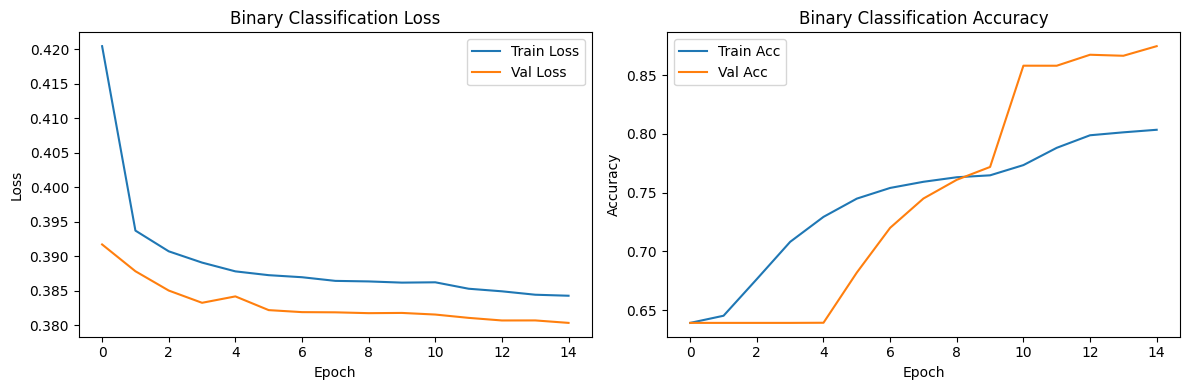

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Binary Classification Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Binary Classification Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.load_state_dict(torch.load('best_binary_model.pth'))

for param in model.conv1_3.parameters():
    param.requires_grad = False
for param in model.conv1_5.parameters():
    param.requires_grad = False
for param in model.conv2.parameters():
    param.requires_grad = False
for param in model.bilstm.parameters():
    param.requires_grad = False

optimizer_multi = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0005)

In [ ]:
def train_epoch_multiclass(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for batch_x, batch_y in loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_x, stage='multiclass')
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(batch_y).sum().item()
        total += batch_y.size(0)
    
    return total_loss / len(loader), correct / total

In [ ]:
multi_train_losses = []
multi_train_accs = []

print("\nPhase 2: Training Multi-class Classifier")
for epoch in range(10):
    train_loss, train_acc = train_epoch_multiclass(model, multiclass_loader, multiclass_criterion, optimizer_multi, device)
    multi_train_losses.append(train_loss)
    multi_train_accs.append(train_acc)
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}: Multiclass Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")


Phase 2: Training Multi-class Classifier


RuntimeError: weight tensor should be defined either for all 9 classes or no classes but got weight tensor of shape: [10]

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(multi_train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multi-class Classification Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(multi_train_accs, label='Train Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Multi-class Classification Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
for param in model.parameters():
    param.requires_grad = True

optimizer_joint = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)

In [ ]:
def train_epoch_joint(model, loader, binary_criterion, multiclass_criterion, optimizer, device):
    model.train()
    total_loss = 0
    binary_correct = 0
    total = 0
    
    for batch_x, batch_y_binary, batch_y_attack in loader:
        batch_x = batch_x.to(device)
        batch_y_binary = batch_y_binary.to(device)
        batch_y_attack = batch_y_attack.to(device)
        
        optimizer.zero_grad()
        
        binary_output, multiclass_output = model(batch_x, stage='both')
        binary_output = binary_output.squeeze()
        
        binary_loss = binary_criterion(binary_output, batch_y_binary)
        []
        attack_mask = batch_y_binary == 1
        if attack_mask.sum() > 0:
            attack_labels = batch_y_attack[attack_mask]
            attack_predictions = multiclass_output[attack_mask]
            multiclass_loss = multiclass_criterion(attack_predictions, attack_labels)
            total_loss_batch = binary_loss + 0.5 * multiclass_loss
        else:
            total_loss_batch = binary_loss
        
        total_loss_batch.backward()
        optimizer.step()
        
        total_loss += total_loss_batch.item()
        predicted = (torch.sigmoid(binary_output) > 0.5).float()
        binary_correct += (predicted == batch_y_binary).sum().item()
        total += batch_y_binary.size(0)
    
    return total_loss / len(loader), binary_correct / total

In [ ]:
joint_train_losses = []
joint_val_losses = []
joint_train_accs = []
joint_val_accs = []

print("\nPhase 3: Joint Fine-tuning")
for epoch in range(10):
    train_loss, train_acc = train_epoch_joint(model, train_loader, binary_criterion, multiclass_criterion, optimizer_joint, device)
    val_loss, val_acc, val_prec, val_rec, val_f1 = evaluate_binary(model, val_loader, binary_criterion, device)
    
    joint_train_losses.append(train_loss)
    joint_val_losses.append(val_loss)
    joint_train_accs.append(train_acc)
    joint_val_accs.append(val_acc)
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}: Joint Train Loss: {train_loss:.4f}, Binary Acc: {train_acc:.4f}")
        print(f"Val Binary Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

In [ ]:
joint_train_losses = []
joint_val_losses = []
joint_train_accs = []
joint_val_accs = []

print("\nPhase 3: Joint Fine-tuning")
for epoch in range(10):
    train_loss, train_acc = train_epoch_joint(model, train_loader, binary_criterion, multiclass_criterion, optimizer_joint, device)
    val_loss, val_acc, val_prec, val_rec, val_f1 = evaluate_binary(model, val_loader, binary_criterion, device)
    
    joint_train_losses.append(train_loss)
    joint_val_losses.append(val_loss)
    joint_train_accs.append(train_acc)
    joint_val_accs.append(val_acc)
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}: Joint Train Loss: {train_loss:.4f}, Binary Acc: {train_acc:.4f}")
        print(f"Val Binary Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(joint_train_losses, label='Train Loss')
plt.plot(joint_val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Joint Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(joint_train_accs, label='Train Acc')
plt.plot(joint_val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Joint Training Binary Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def evaluate_hierarchical(model, loader, device):
    model.eval()
    binary_predictions = []
    multiclass_predictions = []
    true_binary = []
    true_attack = []
    
    with torch.no_grad():
        for batch_x, batch_y_binary, batch_y_attack in loader:
            batch_x = batch_x.to(device)
            
            binary_output, multiclass_output = model(batch_x, stage='both')
            binary_pred = (torch.sigmoid(binary_output.squeeze()) > 0.5).float()
            _, multiclass_pred = multiclass_output.max(1)
            
            binary_predictions.extend(binary_pred.cpu().numpy())
            multiclass_predictions.extend(multiclass_pred.cpu().numpy())
            true_binary.extend(batch_y_binary.numpy())
            true_attack.extend(batch_y_attack.numpy())
    
    binary_predictions = np.array(binary_predictions)
    multiclass_predictions = np.array(multiclass_predictions)
    true_binary = np.array(true_binary)
    true_attack = np.array(true_attack)
    
    binary_accuracy = np.mean(binary_predictions == true_binary)
    
    attack_mask = (binary_predictions == 1) & (true_binary == 1)
    if attack_mask.sum() > 0:
        multiclass_accuracy = np.mean(multiclass_predictions[attack_mask] == true_attack[attack_mask])
    else:
        multiclass_accuracy = 0.0
    
    return binary_accuracy, multiclass_accuracy, binary_predictions, multiclass_predictions, true_binary, true_attack

In [ ]:
binary_acc, multi_acc, binary_preds, multi_preds, true_binary, true_attack = evaluate_hierarchical(model, test_loader, device)
print(f"\nFinal Test Results:")
print(f"Binary Classification Accuracy: {binary_acc:.4f}")
print(f"Multi-class Classification Accuracy (on detected attacks): {multi_acc:.4f}")

In [ ]:
plt.figure(figsize=(8, 6))
cm_binary = confusion_matrix(true_binary, binary_preds)
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues')
plt.title('Binary Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5], ['Normal', 'Attack'])
plt.yticks([0.5, 1.5], ['Normal', 'Attack'])
plt.show()

In [ ]:
attack_mask = (binary_preds == 1) & (true_binary == 1)
if attack_mask.sum() > 0:
    cm_multi = confusion_matrix(true_attack[attack_mask], multi_preds[attack_mask])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues')
    plt.title('Multi-class Classification Confusion Matrix (Correctly Detected Attacks)')
    plt.xlabel('Predicted Attack Type')
    plt.ylabel('True Attack Type')
    plt.show()
    
    unique_attacks = np.unique(true_attack[attack_mask])
    print(f"\nPer-class accuracy for detected attacks:")
    for attack_type in unique_attacks:
        mask = true_attack[attack_mask] == attack_type
        if mask.sum() > 0:
            acc = (multi_preds[attack_mask][mask] == attack_type).mean()
            print(f"Attack Type {attack_type}: {acc:.4f} ({mask.sum()} samples)")

In [ ]:
from sklearn.metrics import classification_report

print("\nBinary Classification Report:")
print(classification_report(true_binary, binary_preds, target_names=['Normal', 'Attack']))

if attack_mask.sum() > 0:
    print("\nMulti-class Classification Report (on detected attacks):")
    attack_names = [f'Attack_{i}' for i in range(10)]
    print(classification_report(true_attack[attack_mask], multi_preds[attack_mask], 
                              target_names=attack_names, labels=range(10), zero_division=0))

In [ ]:
torch.save({
    'model_state_dict': model.state_dict(),
    'scaler': scaler,
    'top_20_features': top_20columns,
    'model_config': {
        'input_features': 20,
        'seq_length': 10,
        'num_attack_types': 10
    },
    'performance': {
        'binary_accuracy': binary_acc,
        'multiclass_accuracy': multi_acc,
        'training_history': {
            'binary_train_losses': train_losses,
            'binary_val_losses': val_losses,
            'binary_train_accs': train_accs,
            'binary_val_accs': val_accs
        }
    }
}, 'hierarchical_nids_final.pth')


In [ ]:
model_params = sum(p.numel() for p in model.parameters())
model_size_mb = model_params * 4 / (1024 * 1024)
print(f"\nModel Statistics:")
print(f"Total parameters: {model_params:,}")
print(f"Model size: {model_size_mb:.2f} MB")